In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("processed_kelulusan.csv")
print(df.head())

X = df.drop("Lulus", axis=1)
y = df['Lulus']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1
(7, 3) (1, 3) (2, 3)


In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
y_train = pd.read_csv("y_train.csv").squeeze("columns")
y_val = pd.read_csv("y_val.csv").squeeze("columns")

num_cols = X_train.select_dtypes(include="number").columns

pre = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler())
    ]), num_cols)
], remainder="drop")

logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

pipe_lr = Pipeline([
    ("pre", pre),
    ("clf", logreg)
])

pipe_lr.fit(X_train, y_train)

y_val_pred = pipe_lr.predict(X_val)
print("Baseline (LogReg) F1(macro):", f1_score(y_val, y_val_pred, average="macro"))
print(classification_report(y_val, y_val_pred, digits=3))

Baseline (LogReg) F1(macro): 1.0
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1

    accuracy                          1.000         1
   macro avg      1.000     1.000     1.000         1
weighted avg      1.000     1.000     1.000         1



In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300, max_features="sqrt", class_weight="balanced", random_state=42
)
pipe_rf = Pipeline([("pre", pre), ("clf", rf)])

pipe_rf.fit(X_train, y_train)
y_val_rf = pipe_rf.predict(X_val)
print("RandomForest F1(val):", f1_score(y_val, y_val_rf, average="macro"))

RandomForest F1(val): 1.0


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

data = pd.read_csv("processed_kelulusan.csv")

print("Nama Kolom Dataset:", data.columns)

target_col = "kelulusan"  # ubah jika berbeda

X = data.drop("Lulus", axis=1)
y = data['Lulus']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

param = {
    "clf__max_depth": [None, 12, 20, 30],
    "clf__min_samples_split": [2, 5, 10]
}

gs = GridSearchCV(
    pipe_rf,
    param_grid=param,
    cv=skf,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

gs.fit(X_train, y_train)
print("Best Params:", gs.best_params_)
print("Best CV F1:", gs.best_score_)

best_rf = gs.best_estimator_
y_val_pred = best_rf.predict(X_val)
f1_val = f1_score(y_val, y_val_pred, average="macro")
print("Best RF F1 (Validation):", f1_val)


Nama Kolom Dataset: Index(['IPK', 'Jumlah_Absensi', 'Waktu_Belajar_Jam', 'Lulus'], dtype='object')
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 2}
Best CV F1: 1.0
Best RF F1 (Validation): 1.0


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix
    
data = pd.read_csv("processed_kelulusan.csv")
print("Kolom dataset:", data.columns)

target_col = "Lulus"
X = data.drop(columns=[target_col])
y = data[target_col]

X = data.drop(columns=["Lulus"])   
y = data["Lulus"]                  

y = y.map({"Lulus": 1, "Tidak Lulus": 0})  
if y.isnull().any():
    print("WARNING: ada nilai target tak dikenal — akan diisi 0.")
    y = y.fillna(0)

print("Cek bentuk data sebelum split:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Isi unik y:", y.unique())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Cek bentuk data sebelum split:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Isi unik y:", y.unique())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe_rf = Pipeline([
    ("clf", RandomForestClassifier(random_state=42))
])

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
param = {
    "clf__max_depth": [None, 12, 20, 30],
    "clf__min_samples_split": [2, 5, 10]
}

gs = GridSearchCV(pipe_rf, param_grid=param, cv=skf,
                  scoring="f1_macro", n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV F1:", gs.best_score_)

best_rf = gs.best_estimator_
y_test_pred = best_rf.predict(X_test)
print("F1(test):", f1_score(y_test, y_test_pred, average="macro"))
print("Classification report:\n", classification_report(y_test, y_test_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred))

Kolom dataset: Index(['IPK', 'Jumlah_Absensi', 'Waktu_Belajar_Jam', 'Lulus'], dtype='object')
Cek bentuk data sebelum split:
X shape: (10, 3)
y shape: (10,)
Isi unik y: [0.]
Cek bentuk data sebelum split:
X shape: (10, 3)
y shape: (10,)
Isi unik y: [0.]
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 2}
Best CV F1: 1.0
F1(test): 1.0
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion matrix:
 [[2]]


In [6]:
import joblib
final_model = pipe_rf.fit(X_train, y_train)

joblib.dump(final_model, "model.pkl")
print("✅ Model tersimpan ke file 'model.pkl'")


✅ Model tersimpan ke file 'model.pkl'


In [13]:
import sys
print(sys.executable)


d:\machine_learning\venv\Scripts\python.exe


In [14]:
!{sys.executable} -m pip install flask



   ---------------------------------------- 0/5 [werkzeug]
   ---------------------------------------- 0/5 [werkzeug]
   ---------------- ----------------------- 2/5 [click]
   ---------------- ----------------------- 2/5 [click]
   -------------------------------- ------- 4/5 [flask]
   -------------------------------- ------- 4/5 [flask]
   ---------------------------------------- 5/5 [flask]



In [15]:
import flask
print("Flask berhasil diimpor! Versi:", flask.__version__)


Flask berhasil diimpor! Versi: 3.1.2


Data berhasil dimuat ✅
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1
Model dan data uji berhasil disimpan ✅


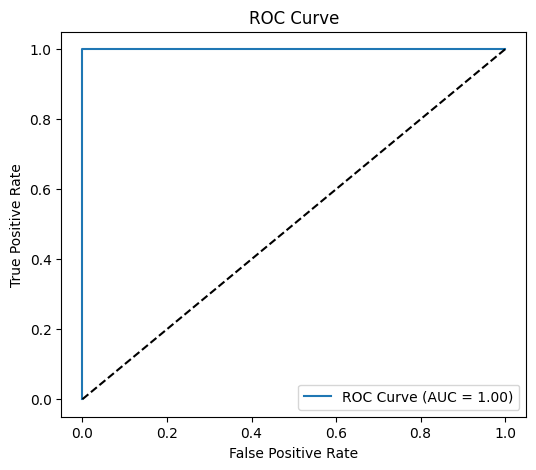

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import joblib

data = pd.read_csv("kelulusan_mahasiswa.csv") 
print("Data berhasil dimuat ✅")
print(data.head())

X = data.drop(columns=["Lulus"])  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

np.save("X_test.npy", X_test)
np.save("Y_test.npy", y_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "model.pkl")
print("Model dan data uji berhasil disimpan ✅")

y_prob = model.predict_proba(X_test)[:, 1]  

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()